In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.head(5)

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,RhoHV,RhoHV_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
0,1,3,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
1,1,16,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
2,1,25,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
3,1,35,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
4,1,45,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254


In [4]:
train.shape

(13765201, 24)

Info about train data
* 20 day time period from Apr 2004 to August 2004
* id pertains to a certain gauge at a certain time 
* so it useless trying order them by ID's
* we have minutes past
* my idea is that we want to predict the rainfaill for the last time time point in the interval, using data at $t_{last -1}$
* interpolate to get 60
* leave and pad to 60
* let the NN define an interpolation technique

How many unqiue ID's are there?

In [5]:
unqs = np.unique(train['Id'],return_counts=True)

In [6]:
print('Unique IDs are:',len(unqs[0]))

Unique IDs are: 1180945


In [7]:
np.max(unqs[0])

1180945

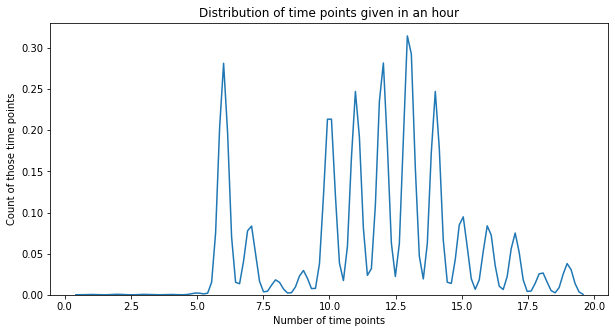

In [8]:
plt.figure(figsize=(10,5))
sns.kdeplot(unqs[1])
plt.title('Distribution of time points given in an hour')
plt.xlabel('Number of time points')
plt.ylabel('Count of those time points')
plt.show()

It may be the case that I have a complete interval from 0 to 60

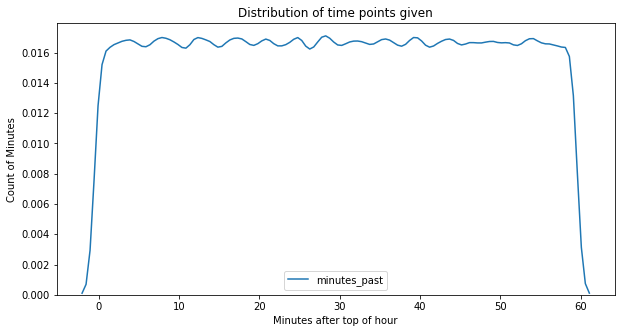

In [9]:
plt.figure(figsize=(10,5))
sns.kdeplot(train['minutes_past'])
plt.title('Distribution of time points given')
plt.xlabel("Minutes after top of hour")
plt.ylabel('Count of Minutes')
plt.show()

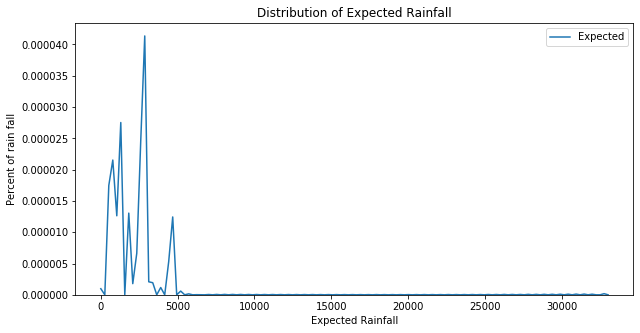

In [10]:
plt.figure(figsize=(10,5))
sns.kdeplot(train['Expected'])
plt.title('Distribution of Expected Rainfall')
plt.xlabel("Expected Rainfall")
plt.ylabel('Percent of rain fall')
plt.show()

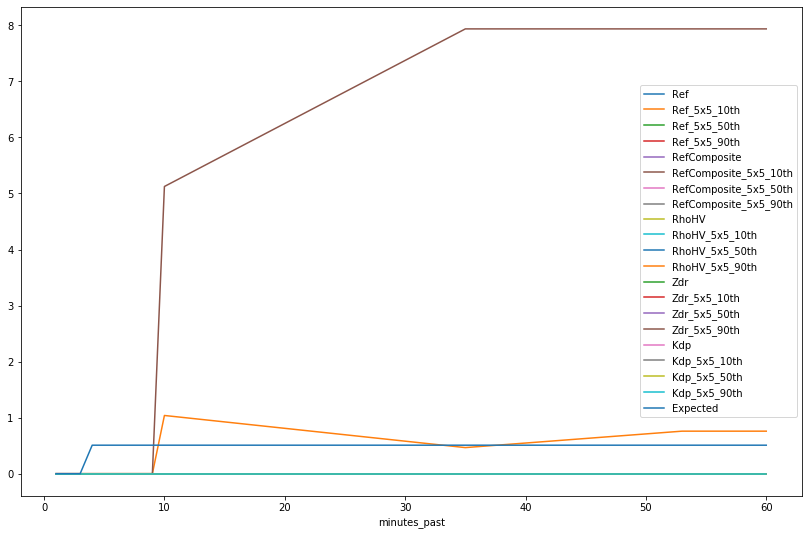

In [11]:
cols_to_plot = [col for col in list(train.columns) if not (col == 'Id' or col == 'radardist_km' or col == 'minutes_past')]
id_to_plot = np.random.choice(unqs[0],1)
a = train[train['Id'] == int(id_to_plot)]
a = a.drop_duplicates('minutes_past')
a = a.set_index('minutes_past').reindex(range(1,61, 1)).interpolate()
a = a.fillna(0)
a[cols_to_plot].plot.line(figsize=(14,9))







In [12]:
a

,Id,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,RhoHV,RhoHV_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
minutes_past,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.000
4,47518.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.508
5,47518.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.508
6,47518.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.508
7,47518.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.508
8,47518.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.508
9,47518.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.508


Lets define a create batch function
* randomly choose a size n withhout replacement from the unique IDS
* it will pull the dataframe
* ffil on them
* grab the arrays
* reshape arrays into shapw (n,60, 23)
* grab the exepcted measuremnts
* reshape into long vector for y
* filter out for outliers, deleting instances of too much rainfall

In [13]:
cutoff = 74
print(train.shape)
print(train[train['Expected'] < cutoff].shape)

train = train[train['Expected'] < cutoff]

(13765201, 24)
(12727514, 24)


### Drop NaNs in Ref column

In [14]:
a = np.isnan(train['Ref'])

In [15]:
print('NANS in Ref column are:',sum(a))

NANS in Ref column are: 6490450


In [16]:
print('shape before dropping nans in Ref was', train.shape)
train = train[~a]
print('shape after dropping nans in Ref is', train.shape)

shape before dropping nans in Ref was (12727514, 24)
shape after dropping nans in Ref is (6237064, 24)


### How many IDS, use to approximate the number of iterations to define epoch
* re implement with new batch size function to traverse whole set

In [17]:
counts = train['Id'].value_counts()
len(counts)

714885

In [18]:
def create_batch_size(space, batch_size):
    #pull random sample from 0 to 1180945
    idxs = np.random.choice(a = range(0,1180945+1), size = batch_size, replace=True)
    #traverse each idx
    y_s = np.zeros(batch_size)
    x_s = []
    for i in range(0,len(idxs)):
        #subset train
        cols = [col for col in list(space.columns) if not (col == 'Id' or col == 'radardist_km' or col == 'minutes_past')]
        a = space[space['Id'] == idxs[i]]
        a = a.drop_duplicates('minutes_past')
        a = a.set_index('minutes_past').reindex(range(1,61, 1)).interpolate()
        a = a.fillna(0)
        #grab the max value from a
        y = np.max(a['Expected'])
        #put in y_s
        y_s[i] = y
        #only graby xvalues minus expected, update list
        cols = [col for col in cols if not col == 'Expected']
        #resubet a
        a = a[cols]
        a = a.values
        #put in x_s
        x_s.append(a)
    #change format of x_s
    x_s = np.array(x_s)
    return(x_s,y_s)
    

In [21]:
a,b = create_batch_size(space=train, batch_size=7)
np.std(a[2,:,:],axis=0)

array([5.2856436 , 4.96776639, 5.35468499, 5.96627565, 5.49896996,
       5.10276981, 5.62335396, 6.13094754, 0.17396855, 0.16327692,
       0.17420911, 0.17808446, 1.15213396, 0.35705983, 0.18920712,
       0.51875478, 3.50328756, 2.22505887, 0.87861713, 2.43422659])

In [22]:
np.std(a[2,:,:],axis=0)

array([5.2856436 , 4.96776639, 5.35468499, 5.96627565, 5.49896996,
       5.10276981, 5.62335396, 6.13094754, 0.17396855, 0.16327692,
       0.17420911, 0.17808446, 1.15213396, 0.35705983, 0.18920712,
       0.51875478, 3.50328756, 2.22505887, 0.87861713, 2.43422659])

### Modeling
* start with a small sample first and notice the loss go down

In [23]:
X_val,y_val = create_batch_size(space=train,batch_size=400)

In [24]:
X_val.shape

(400, 60, 20)

In [25]:
import tensorflow as tf
# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [65]:
reset_graph()

n_steps = 60
n_inputs = 20
n_neurons = 300
n_outputs = 1
learning_rate = 0.0001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None])

training = tf.placeholder_with_default(False, shape=(), name='training')

cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
X_bn = tf.layers.batch_normalization(X, training=training, momentum=0.5)
rnn_outputs, states = tf.nn.dynamic_rnn(cell, X_bn, dtype=tf.float32)

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1,n_steps, n_outputs])

loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [66]:
len(counts) / 64

11170.078125

In [29]:
import time

In [ ]:
n_iterations = 200
batch_size = 32
epochs = 250

with tf.Session() as sess:
    init.run()
    history_train_mse = []
    history_val_mse = []
    t1 = time.time()
    for epoch in range(epochs):
        for iteration in range(n_iterations):
            X_batch, y_batch = create_batch_size(space=train, batch_size=batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        
        #get loss and mse after training in data set after enough iterations have been done
        train_mse = loss.eval(feed_dict={X:X_batch, y:y_batch})
        val_mse = loss.eval(feed_dict={X: X_val, y: y_val})
        history_train_mse.append(train_mse)
        history_val_mse.append(val_mse)
        
        print(epoch, "\ttrain_MSE:", train_mse, "\tval_mse", val_mse, '\ttrain_time is', (time.time()- t1)/60)
    
    #store preds
    #it returns and output at every t value from 0 to 60, i only want the final endpoint
    y_pred = sess.run(outputs, feed_dict={X: X_batch})
    y_test = y_batch

    saver.save(sess, "./how_much_rain_1")

0 	train_MSE: 49.864414 	val_mse 15.342058 	train_time is 2.2826283017794293
1 	train_MSE: 37.522762 	val_mse 14.720235 	train_time is 4.472876715660095
2 	train_MSE: 51.397926 	val_mse 14.63394 	train_time is 6.643282667795817
3 	train_MSE: 5.65596 	val_mse 14.86004 	train_time is 8.840821782747904
4 	train_MSE: 9.409103 	val_mse 14.531005 	train_time is 11.045172182718913
5 	train_MSE: 25.41679 	val_mse 14.5926 	train_time is 13.221864314874013
6 	train_MSE: 24.469429 	val_mse 14.535513 	train_time is 15.404265916347503
7 	train_MSE: 3.507682 	val_mse 14.480498 	train_time is 17.56757789850235
8 	train_MSE: 2.9305792 	val_mse 14.7574215 	train_time is 19.662133264541627
9 	train_MSE: 32.31049 	val_mse 14.471332 	train_time is 21.76432353258133
10 	train_MSE: 23.810848 	val_mse 14.641203 	train_time is 23.82270599603653
11 	train_MSE: 7.6784616 	val_mse 14.570768 	train_time is 25.885451583067574
12 	train_MSE: 6.5071087 	val_mse 14.493912 	train_time is 27.956871950626372
13 	train_M

In [99]:
((1.0967*2)*250)/60

9.139166666666666

In [86]:
np.sum(np.square(y_pred[:,59,:1].reshape(-1) - y_test)) / 32

11.910533166524539

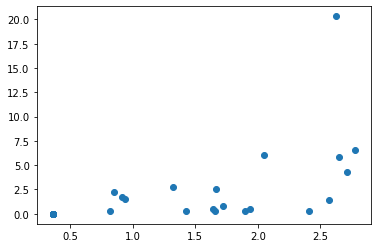

In [87]:
plt.scatter(y_pred[:,59,:1].reshape(-1),y_test)
plt.show()

In [90]:
y_pred[:,55] - y_test

array([[ 0.94315092, -4.89885208,  1.45115119, ...,  1.45115119,
         0.28015062,  1.70515132],
       [ 1.911606  , -3.930397  ,  2.41960627, ...,  2.41960627,
         1.2486057 ,  2.6736064 ],
       [ 0.74470035, -5.09730265,  1.25270062, ...,  1.25270062,
         0.08170005,  1.50670075],
       ...,
       [ 1.1417325 , -4.7002705 ,  1.64973277, ...,  1.64973277,
         0.4787322 ,  1.9037329 ],
       [ 1.82179038, -4.02021262,  2.32979065, ...,  2.32979065,
         1.15879008,  2.58379078],
       [-0.39931779, -6.24132079,  0.10868248, ...,  0.10868248,
        -1.06231809,  0.36268261]])

In [42]:
reset_graph()

n_steps = 60
n_inputs = 20
n_neurons = 200
n_outputs = 1
n_layers = 3

learning_rate = 0.00001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None])
keep_prob = tf.placeholder_with_default(.2, shape=())

lstm_cells = [tf.nn.rnn_cell.BasicLSTMCell(num_units=n_neurons)
              for layer in range(n_layers)]
cells_drop = [tf.nn.rnn_cell.DropoutWrapper(cell, input_keep_prob=keep_prob)
              for cell in lstm_cells]
multi_cell = tf.nn.rnn_cell.MultiRNNCell(lstm_cells)
outputs, states = tf.nn.dynamic_rnn(multi_cell, X, dtype=tf.float32)
top_layer_h_state = states[-1][1]

predictions = tf.layers.dense(top_layer_h_state, n_outputs)


loss = tf.reduce_mean(tf.square(predictions - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [43]:
n_iterations = 200
batch_size = 32
epochs = 200

with tf.Session() as sess:
    init.run()
    history_train_mse = []
    history_val_mse = []
    t1 = time.time()
    for epoch in range(epochs):
        for iteration in range(n_iterations):
            X_batch, y_batch = create_batch_size(space=train, batch_size=batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        
        #get loss and mse after training in data set after enough iterations have been done
        train_mse = loss.eval(feed_dict={X:X_batch, y:y_batch})
        val_mse = loss.eval(feed_dict={X: X_val, y: y_val})
        history_train_mse.append(train_mse)
        history_val_mse.append(val_mse)
        
        print(epoch, "\ttrain_MSE:", train_mse, "\tval_mse", val_mse, '\ttrain_time is', (time.time()- t1)/60)
    
    #store preds
    #it returns and output at every t value from 0 to 60, i only want the final endpoint
    y_pred = sess.run(outputs, feed_dict={X: X_batch})
    y_test = y_batch

    saver.save(sess, "./how_much_rain_2")

0 	train_MSE: 3.798653 	val_mse 32.47119 	train_time is 2.5930006821950276
1 	train_MSE: 16.053972 	val_mse 30.696415 	train_time is 5.413065866629283
2 	train_MSE: 4.1023016 	val_mse 30.640223 	train_time is 8.18803476492564
3 	train_MSE: 19.518246 	val_mse 30.604818 	train_time is 10.799660682678223
4 	train_MSE: 4.6405606 	val_mse 30.625126 	train_time is 13.59039338429769
5 	train_MSE: 6.6793985 	val_mse 30.512243 	train_time is 16.305138301849365
6 	train_MSE: 95.1867 	val_mse 30.718884 	train_time is 19.15134366750717
7 	train_MSE: 18.101116 	val_mse 30.563913 	train_time is 21.94446906646093
8 	train_MSE: 4.0554357 	val_mse 30.518297 	train_time is 24.73848421573639
9 	train_MSE: 8.165883 	val_mse 30.535522 	train_time is 27.635292784372965
10 	train_MSE: 29.803173 	val_mse 30.588802 	train_time is 30.59826771815618
11 	train_MSE: 6.3166275 	val_mse 30.59535 	train_time is 33.31364645163218
12 	train_MSE: 11.835841 	val_mse 30.528465 	train_time is 35.8249805132548
13 	train_MSE

107 	train_MSE: 25.288303 	val_mse 30.581097 	train_time is 275.11463356812794
108 	train_MSE: 8.065634 	val_mse 30.572838 	train_time is 277.62117796738943
109 	train_MSE: 6.2396235 	val_mse 30.6423 	train_time is 280.1354948004087
110 	train_MSE: 11.463978 	val_mse 30.525629 	train_time is 282.6427845835686
111 	train_MSE: 5.116405 	val_mse 30.50513 	train_time is 285.15710956255595
112 	train_MSE: 6.034033 	val_mse 30.574673 	train_time is 287.66844398180643
113 	train_MSE: 53.06539 	val_mse 30.648 	train_time is 290.1858040332794
114 	train_MSE: 39.645428 	val_mse 30.53849 	train_time is 292.70026838382086
115 	train_MSE: 5.2205105 	val_mse 30.491907 	train_time is 295.21749659776685
116 	train_MSE: 46.418423 	val_mse 30.52142 	train_time is 297.76103165149686
117 	train_MSE: 21.28818 	val_mse 30.576073 	train_time is 300.37956366539004
118 	train_MSE: 15.217536 	val_mse 30.599531 	train_time is 302.8821169177691
119 	train_MSE: 10.4898815 	val_mse 30.564957 	train_time is 305.3874

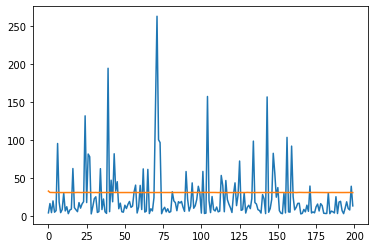

In [45]:
plt.plot(history_train_mse)
plt.plot(history_val_mse)
plt.show()

Well this sucks, BPTT might be bad for 60 time steps, or maybe because I'm not going through the whole dataset in each epoch, which would talk too much time. In fact it would be intractable. I could use a smaller sample and see if I can drive the loss down at least

## Try different strucutre with keras

In [2]:
THRESHOLD = 73 

In [3]:
train_data = pd.read_csv('train.csv', nrows=4e6)

In [4]:
raw_ids_all = train_data["Id"]
raw_ids = raw_ids_all.unique()

Idnefity outliers

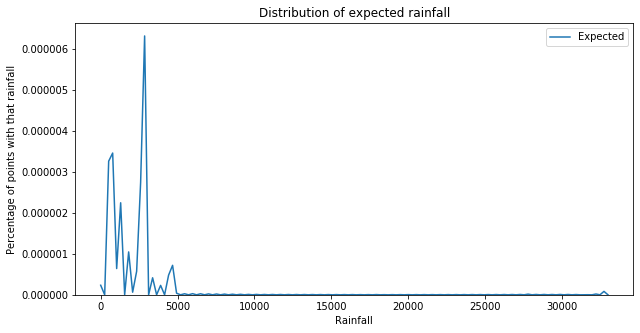

In [11]:
plt.figure(figsize=(10,5))
sns.kdeplot(train['Expected'])
plt.title('Distribution of expected rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Percentage of points with that rainfall')
plt.show()